##             Lecture 05
                                      
plotnine             
                                       
   - `ggplot` and `aes` – building blocks of graphs
   - themes
   - manipulating axis              
   - adding lines and               
       annotations                  
   - Commonly used other plots:     
     - bar, box, violin             
   - theme_bg() and                 
      formatting principles in book 
                                    
Case study:                          
  Ch03B Comparing hotel prices        
      in Europe: Vienna vs London     
                                      
Dataset:                              
 hotels-europe                        

Import packages

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

## 0. Data import and filter
Use the london-vienna dataset to introduce different aspects of plotnine


import the prices and features of hotels

In [2]:
hotels_europe_price = pd.read_csv("https://osf.io/p6tyr/download")
hotels_europe_features = pd.read_csv("https://osf.io/utwjs/download")

Join them by hotel_id

In [3]:
df = hotels_europe_price.merge(hotels_europe_features, on = "hotel_id")
df.head()

,hotel_id,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,...,country,city_actual,rating_reviewcount,center1label,center2label,neighbourhood,ratingta,ratingta_count,distance_alter,accommodation_type
0,1,172,0,0% no offer,2017,11,1,0,1,0,...,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,Amsterdam,4.0,1115.0,3.6,Hotel
1,1,122,1,15-50% offer,2018,1,1,0,1,0,...,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,Amsterdam,4.0,1115.0,3.6,Hotel
2,1,122,1,15-50% offer,2017,12,0,1,1,0,...,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,Amsterdam,4.0,1115.0,3.6,Hotel
3,1,552,1,1-15% offer,2017,12,0,1,4,0,...,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,Amsterdam,4.0,1115.0,3.6,Hotel
4,1,122,1,15-50% offer,2018,2,1,0,1,0,...,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,Amsterdam,4.0,1115.0,3.6,Hotel


Filter

In [4]:
df = (
    df.loc[(df["year"] == 2017) & (df["month"] == 11) & (df["weekend"] == 0)]
    .loc[
        (df["city"].isin(["Vienna", "London"]))
        & (df["city_actual"].isin(["Vienna", "London"]))
    ]
    .loc[df["accommodation_type"] == "Hotel"]
    .loc[(df["stars"] >= 3) & (df["stars"] <= 4)]
    .loc[df["price"] <= 600]
)

Delete unnecessary input files from memory

In [5]:
del hotels_europe_features
del hotels_europe_price

## 1. Basics

We use the `plotnine` package for visualization in Python. This package relates to the ggplot package in R. 

plotnine always has a `ggplot()` function which we usually supply with the data and axis variables and a `geom_*type*()` function added, which decides the type of the graph we want to plot.

Lets create a basic histogram in plotnine

First, filter on the Vienna hotels

In [6]:
vienna_hotels = df.loc[df["city_actual"] == "Vienna"]

Create the ggplot object, with data and specify the x-axis in the `aes()` function

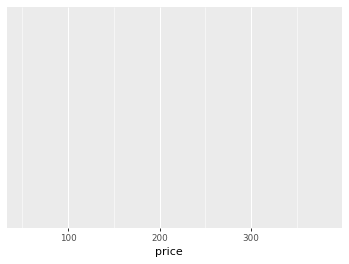

<ggplot: (324680900)>

In [7]:
ggplot(vienna_hotels, aes(x="price"))

As you can see, plotnine recognised the range of the `price` variable, however since we did not supply a `geom_*type*()` it cannod decide what kind of plot we would like to see. 

Let's create a histogram, for which the corresponding function is called `geom_histogram()`

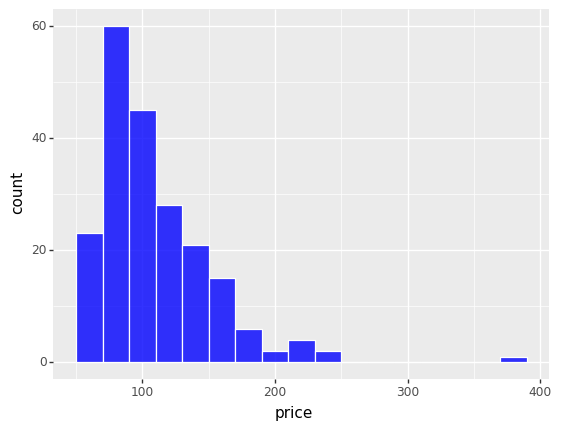

<ggplot: (324781438)>

In [8]:
(
    ggplot(vienna_hotels, aes(x="price"))
    + geom_histogram(
        alpha=0.8, # alpha controls the transparency of bars
        binwidth=20, # sets the width of bins (bars)
        color="white", # sets color for the contour of the bars
        fill="blue", # sets color for the fill of the bars
    )
)

Set the title of axises using the `labs` function

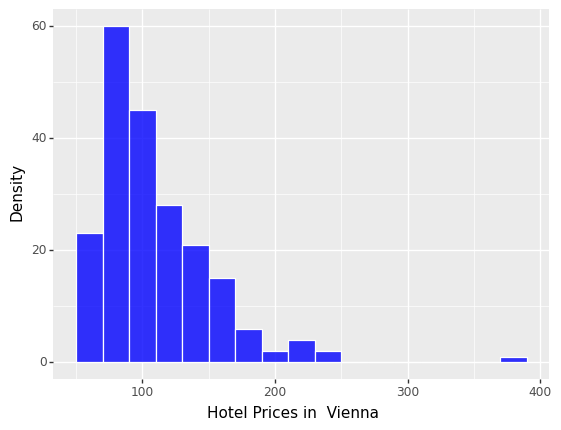

<ggplot: (324691206)>

In [9]:
(
    ggplot(vienna_hotels, aes(x="price"))
    + geom_histogram(alpha=0.8, binwidth=20, color="white", fill="blue")
    + labs(x="Hotel Prices in  Vienna", y="Density")
)

You can try different themes in plotnine

 Mostly used: theme_bw(), theme_grey(), theme_gray(), theme_linedraw(), theme_light, theme_dark,            theme_minimal(), theme_classic(), theme_void()

theme_bw

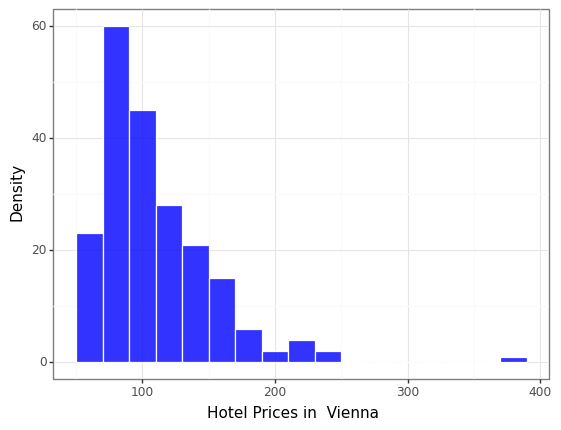

<ggplot: (324871589)>

In [10]:
(
    ggplot(vienna_hotels, aes(x="price"))
    + geom_histogram(alpha=0.8, binwidth=20, color="white", fill="blue")
    + labs(x="Hotel Prices in  Vienna", y="Density")
    + theme_bw()
)

theme_classic

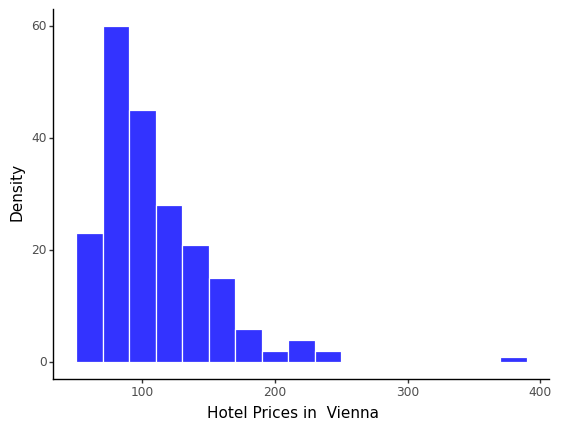

<ggplot: (324908522)>

In [11]:
(
    ggplot(vienna_hotels, aes(x="price"))
    + geom_histogram(alpha=0.8, binwidth=20, color="white", fill="blue")
    + labs(x="Hotel Prices in  Vienna", y="Density")
    + theme_classic()
)

theme_minimal

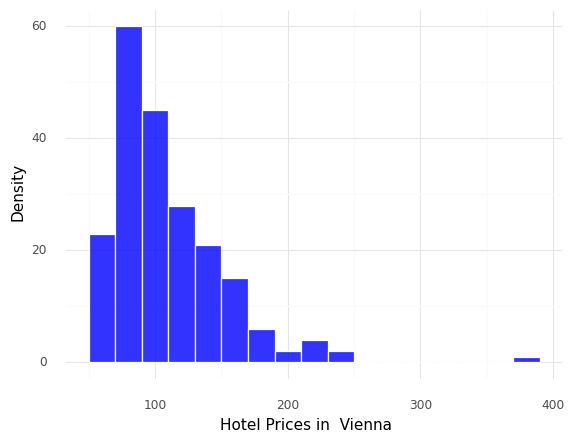

<ggplot: (356219649)>

In [12]:
(
    ggplot(vienna_hotels, aes(x="price"))
    + geom_histogram(alpha=0.8, binwidth=20, color="white", fill="blue")
    + labs(x="Hotel Prices in  Vienna", y="Density")
    + theme_minimal()
)

In the book, and in this class we usually use `theme_bw`

## 2. Manipulating axis

Create a plotnine object

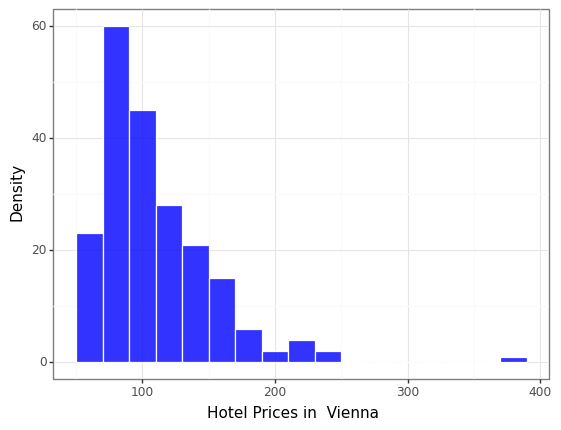

<ggplot: (356243084)>

In [13]:
f1 = (
    ggplot(vienna_hotels, aes(x="price"))
    + geom_histogram(alpha=0.8, binwidth=20, color="white", fill="blue")
    + labs(x="Hotel Prices in  Vienna", y="Density")
    + theme_bw()
)
f1 

Set the axis: 

    1) if continuous variable: `scale_()_continuous`
    2) if discrete/categorical variable: `scale_()_discrete`

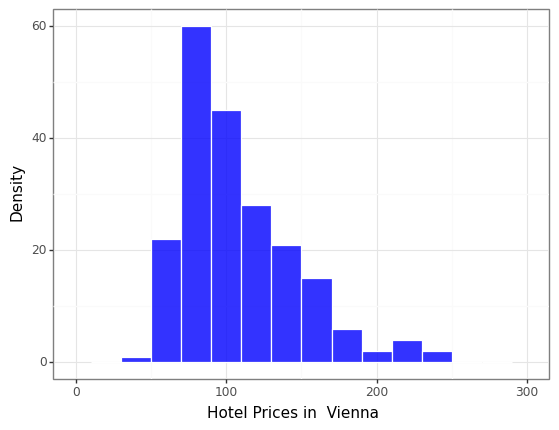

<ggplot: (324840470)>

In [14]:
# a) limit -> changes the limit
f1 + scale_x_continuous(limits=(0, 300))

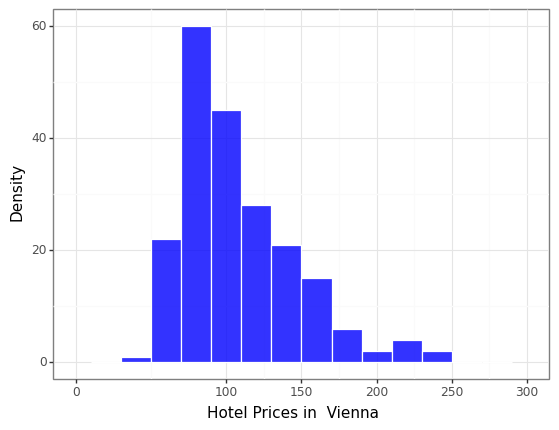

<ggplot: (356268522)>

In [15]:
# b) set tickers, called 'breaks'
f1 + scale_x_continuous(limits=(0, 300), breaks=(0, 100, 150, 200, 250, 300))

### Task: - use only one graph!

  1) Set limits between 0  and 500 for x axis\
  2) Set the breaks with binwidth of 50 for X. Use `np.arange` function instead of typing in each of them!\
  3) set the limits for Y between 0 and 100\
  4) Set the breaks with binwidth of 10 for Y

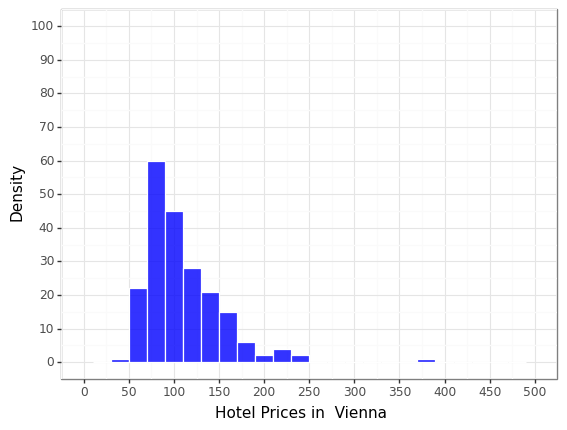

<ggplot: (356356021)>

In [16]:
(
    f1
    + scale_x_continuous(limits=(0, 500), breaks=np.arange(0, 501, 50))
    + scale_y_continuous(limits=(0, 100), breaks=np.arange(0, 101, 10))
)

Note: `np.arrange` returns evenly spaced values within a given interval.

`np.arange` can be called with a varying number of positional arguments:

- `np.arange(stop)` : Values are generated within the half-open interval `[0, stop)` (in other words, the interval including start but excluding stop).

- `np.arange(start, stop)` : Values are generated within the half-open interval `[start, stop)`.

- `np.arange(start, stop, step)` :  Values are generated within the half-open interval `[start, stop)`, with spacing between values given by step.

For integer arguments the function is roughly equivalent to the Python built-in range, but returns an ndarray rather than a range instance.

## 3. Adding lines, texts, ect. to your graph:

a) Add mean and median as lines and annotate them!

add a line as the mean:

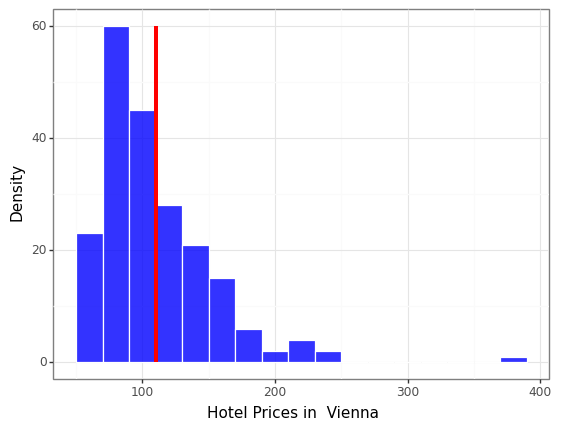

<ggplot: (356320893)>

In [17]:
f1 = f1 + geom_segment(
    aes(
        x=vienna_hotels["price"].mean(),
        y=0,
        xend=vienna_hotels["price"].mean(),
        yend=60,
    ),
    color="red",
    size=1,
)
f1

add annotation which says it is the mean

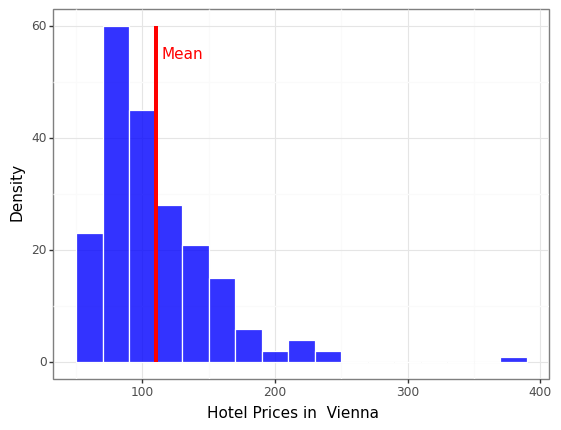

<ggplot: (356531732)>

In [19]:
f1 = f1 + annotate(
    "text", x=vienna_hotels["price"].mean() + 20, y=55, label="Mean", color="red"
)
f1

Add the median as a vertical line to the graph

In [20]:
median_price = vienna_hotels["price"].median()

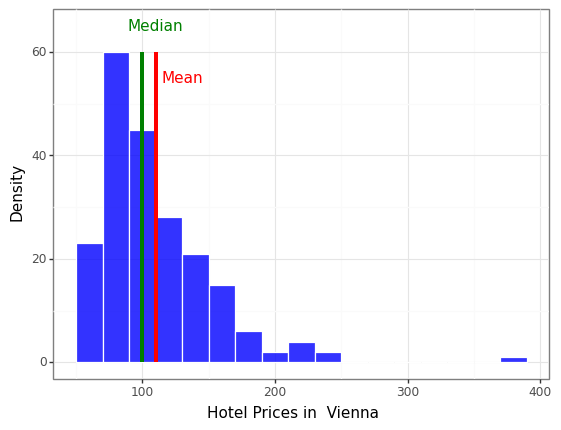

<ggplot: (356524228)>

In [21]:
f1 = (
    f1
    + annotate("text", x=median_price + 10, y=65, label="Median", color="green")
    + geom_segment(
        aes(x=median_price, y=0, xend=median_price, yend=60), color="green", size=1
    )
)
f1

## Task: 

add the 95th percentile to the figure

    advice: create a new variable f2 when trying to write this code
    here we have redefined the variable f1, however when developing a code
    it has several drawbacks to redefine a variable! Discuss!

In [22]:
pctg95_price = vienna_hotels["price"].quantile(q=0.95)

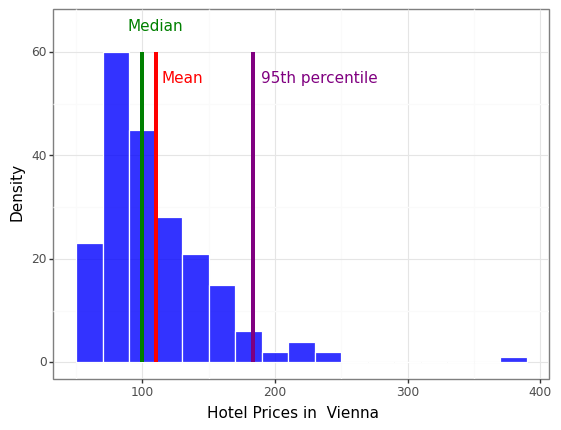

<ggplot: (324908309)>

In [24]:
f2 = (
    f1
    + annotate(
        "text", x=pctg95_price + 50, y=55, label="95th percentile", color="purple"
    )
    + geom_segment(
        aes(x=pctg95_price, y=0, xend=pctg95_price, yend=60), color="purple", size=1
    )
)
f2

## 4. Other frequently used plots

### a. bar graph

 Summarize hotels which are close/medium or far away from the city-center:

Let create a new factor variable

In [25]:
df["distance_f"] = pd.cut(df["distance"], [-1, 2, 4, 100], labels=["close", "medium", "far"])

We are curious about how these hotels distribute in the cities\
Summarize the number of close/medium/far hotels


In [26]:
ds0 = df.groupby(["city","distance_f"])["hotel_id"].count().rename("N").reset_index()
ds0

,city,distance_f,N
0,London,close,187
1,London,medium,172
2,London,far,76
3,Vienna,close,161
4,Vienna,medium,38
5,Vienna,far,8


Do the plot:

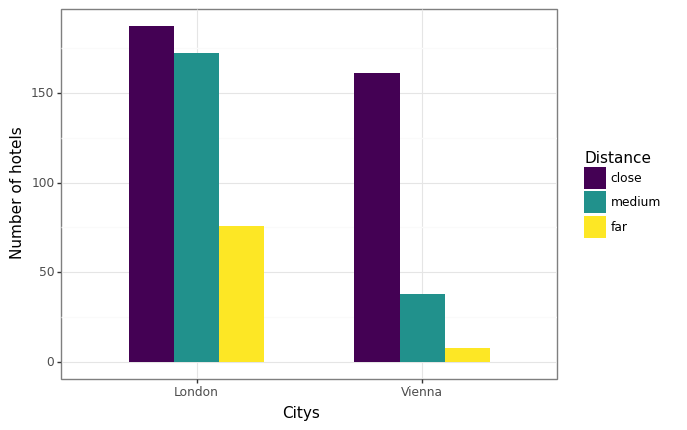

<ggplot: (357889955)>

In [27]:
f3 = (
    ggplot(ds0, aes(x="city", y="N", fill="distance_f"))
    + geom_bar(stat="identity", position="dodge", width=0.6, size=0.5)
    + labs(x="Citys", y="Number of hotels", fill="Distance")
    + theme_bw()
)
f3

Make the legends more pretty: put to the top

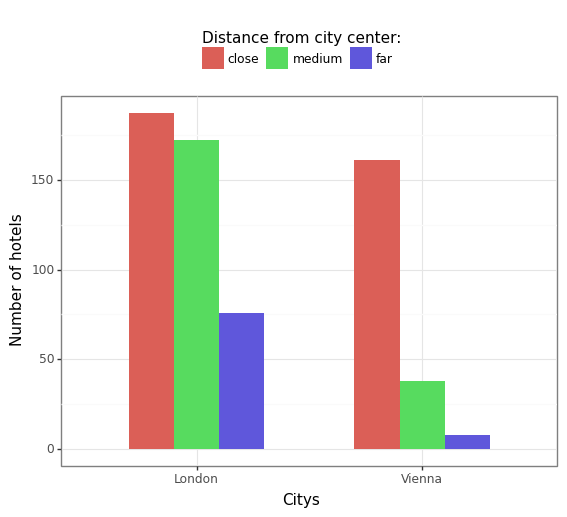

<ggplot: (324845842)>

In [28]:
f3 = (
    f3
    + scale_fill_discrete(name="Distance from city center:")
    + theme(legend_position="top")
)
f3

For stacked bar, within the `geom_bar` function, set the `position` parameter to `stack`

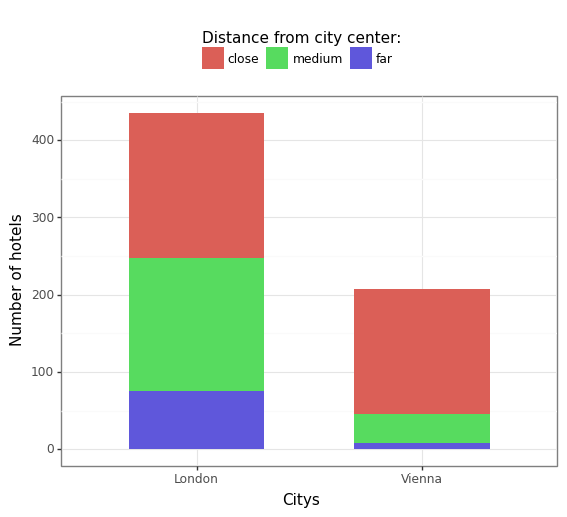

<ggplot: (356355478)>

In [29]:
(
    ggplot(ds0, aes(x="city", y="N", fill="distance_f"))
    + geom_bar(stat="identity", position="stack", width=0.6, size=0.5)
    + labs(x="Citys", y="Number of hotels", fill="Distance")
    + scale_fill_discrete(name="Distance from city center:")
    + theme_bw()
    + theme(legend_position="top")
)

Stacked bar with percentages: using `mizani` package

In [30]:
from mizani.formatters import percent_format

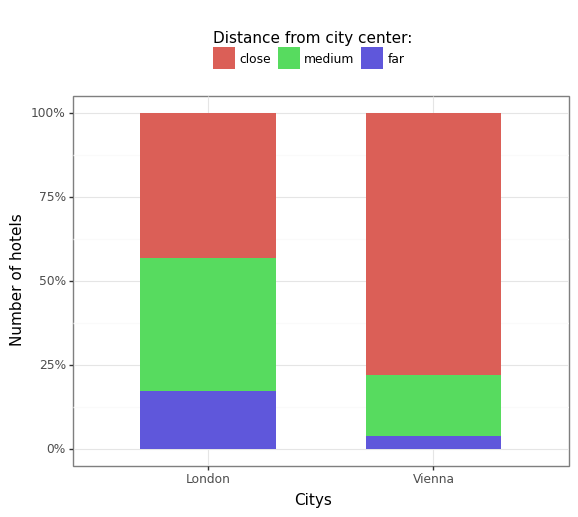

<ggplot: (357845455)>

In [31]:
(
    ggplot(ds0, aes(x="city", y="N", fill="distance_f"))
    + geom_bar(stat="identity", position="fill", width=0.6, size=0.5)
    + labs(x="Citys", y="Number of hotels", fill="Distance")
    + scale_y_continuous(labels=percent_format())
    + scale_fill_discrete(name="Distance from city center:")
    + theme_bw()
    + theme(legend_position="top")
)

### b. Box-plot: great for describe the distribution of the variable in a compact way:
   
Remember: extreme values, lower/upper adjacent = 1.5*IQR, IQR(25%,75%) and median (NO MEAN!)


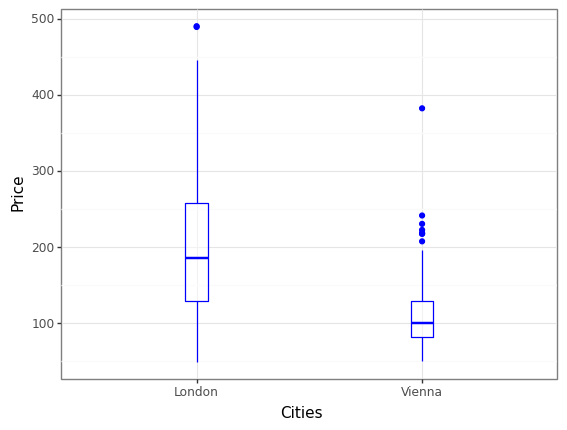

<ggplot: (357953275)>

In [32]:
f4 = (
    ggplot(df, aes(y="price", x="city"))
    + geom_boxplot(color="blue", size=0.5, width=0.1, alpha=0.5)
    + labs(x="Cities", y="Price")
    + theme_bw()
)
f4

Make it a bit more fancy by adding error-bars


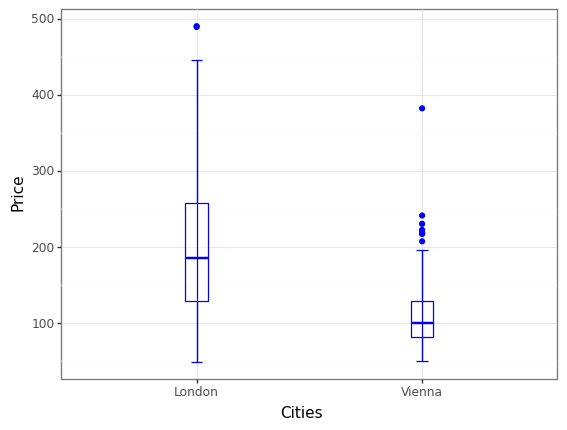

<ggplot: (358021553)>

In [33]:
f4 = f4 + stat_boxplot(geom = "errorbar", width = 0.05,  size = 0.5, color = 'blue')
f4


Add the mean as a dot

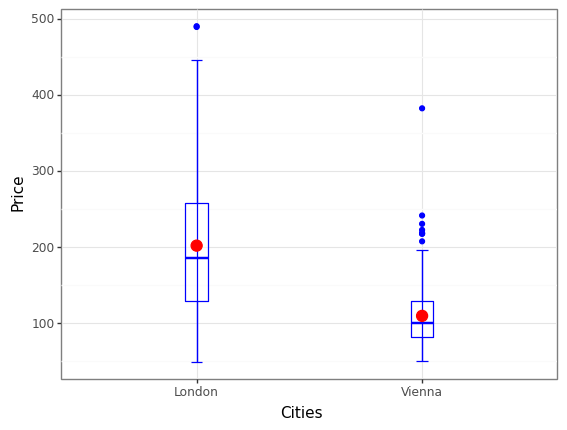

<ggplot: (358065038)>

In [34]:
f4 + stat_summary(fun_data="mean_se", geom="point", size=4, color="red", fill="red")

## c. Violin plot (+boxplot)

violin plots adds a kernel density estimator to the boxplot in a neat way


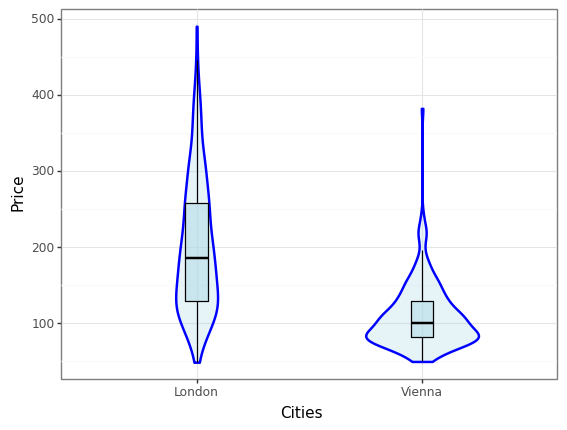

<ggplot: (358128899)>

In [35]:
(
    ggplot(df, aes(y="price", x="city"))
    + geom_violin(
        size=1,
        width=0.5,
        color="blue",
        fill="lightblue",
        trim=True,
        show_legend=False,
        alpha=0.3,
    )
    + geom_boxplot(
        color="black", fill="lightblue", size=0.5, width=0.1, alpha=0.5, outlier_alpha=0
    )
    + labs(x="Cities", y="Price")
    + theme_bw()
)

Extra: can be an extra homework or good for demonstration of a conditional box-plot graph.

## Task:

  1) Create a conditional box-plot for hotel prices, conditioning on the city
  
  2) Add error bars to box-plot
  
  3) Add conditional mean as dots
  
  4) Annotate everything with arrows:
      `geom_segment(aes(x=,y=,xend=,yend=),arrow=arrow(),color=)`
      
  5) use theme_bw()
  
  6) Instead of using 'color = 'blue'', or other colors, use 'color = color[0]' or color[x]

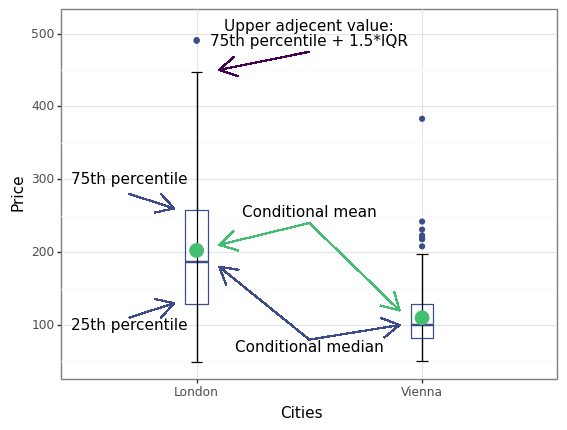

<ggplot: (356413383)>

In [36]:
color = ["#3D4D8AFF", "#43BF71FF", "#440154FF", "#FDE725FF", "#23888EFF"] # these are the colors used in the book

(
    ggplot(df, aes(y="price", x="city"))
    + geom_boxplot(color=color[0], size=0.5, width=0.1, alpha=0.3, outlier_alpha=0.3)
    + labs(x="Cities", y="Price")
    + stat_boxplot(geom="errorbar", width=0.05, size=0.5)
    + stat_summary(
        fun_data="mean_se", geom="point", size=5, color=color[1], fill=color[1]
    )
    + annotate("text", x=1.5, y=255, label="Conditional mean")
    + geom_segment(aes(x=1.5, y=240, xend=1.1, yend=210), arrow=arrow(), color=color[1])
    + geom_segment(aes(x=1.5, y=240, xend=1.9, yend=120), arrow=arrow(), color=color[1])
    + annotate("text", x=1.5, y=70, label="Conditional median")
    + geom_segment(aes(x=1.5, y=80, xend=1.1, yend=180), arrow=arrow(), color=color[0])
    + geom_segment(aes(x=1.5, y=80, xend=1.9, yend=100), arrow=arrow(), color=color[0])
    + annotate("text", x=0.7, y=100, label="25th percentile")
    + geom_segment(aes(x=0.7, y=110, xend=0.9, yend=130), arrow=arrow(), color=color[0])
    + annotate("text", x=0.7, y=300, label="75th percentile")
    + geom_segment(aes(x=0.7, y=280, xend=0.9, yend=260), arrow=arrow(), color=color[0])
    + annotate("text", x=1.5, y=510, label="Upper adjecent value:")
    + annotate("text", x=1.5, y=490, label="75th percentile + 1.5*IQR")
    + geom_segment(aes(x=1.5, y=475, xend=1.1, yend=450), arrow=arrow(), color=color[2])
    + theme_bw()
)